# Ammattilaiset

Tässä tiedostossa analysoidaan ja visualisoidaan Omaolon ammattilaiskyselyn tulokset.

Analysointi on tehty pythonin pandas ja numpy -kirjastoilla.

## Asennus

In [1]:
# Asennetaan paketti tilastokomentoja varten. 
# Komento on kommentoitu, jotta pakettia ei asenneta jokaisella ajokerralla.

#!pip install pingouin --user

In [2]:
# Tuodaan kirjastot

import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import matplotlib.pyplot as plt #visualisointi
import seaborn as sn #korrelaatio
import pingouin as pg
#import pandas_profiling # kysymysten yhteenvetoja varten
plt.style.use('ggplot')

# Datan tuominen

Data tallennetaan "ammattilaiset"-nimiseen muuttujaan.

Tässä tulee varoitus vanhentuneesta paketista, mutta se ei vaikuta työhön.

In [3]:
ammattilaiset = pd.read_csv('Oirearviokysely_2020_Perusraportti_numeerinen.csv', delimiter=';')

#### Tarkistetaan, että datasetti näyttää oikeanlaiselta.

In [4]:
#ammattilaiset.head(10)

#### Tarkistetaan datasetin rivien ja sarakkeiden määrä sekä lasketaan avaintiedot.

In [5]:
ammattilaiset.shape

(118, 39)

In [6]:
ammattilaiset.describe().style

,Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä,Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Työkaverini kannattavat oirearvioiden käyttöä,Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Esimieheni tukevat oirearvioiden käyttöä,Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Ymmärrän organisaatiomme päätöksen ottaa oirearviot käyttöön,Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot nopeuttavat tehtävieni tekemistä,Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla saan enemmän hyödyllistä tietoa asiakkaasta,Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla hoidon tarpeen arviointi on tasalaatuista,Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot lisäävät ammattilaisen työn houkuttelevuutta,Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani hallita asiakasprosessia,Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani ammatilliseen harkintaan työssäni,Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Oirearvioiden avulla asiakkaat saavat nopeasti apua,"Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista on halukkaita käyttämään oirearvioita","Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista osaa käyttää oirearvioita",Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Kokemukseni mukaan asiakkaat ymmärtävät oirearvioiden antamat ohjeet,Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen suositellut asiakasta käyttämään oirearvioita,Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen neuvonut asiakasta oirearvioiden käytössä,Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearviot vastaavat vaatimuksiani,Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa,Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioita on helppo käyttää,"Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut rittävästi tietoa siitä, mitä hyötyä oirearvioista on",Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Minua on kannustettu oirearvioiden käyttöön,Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi perehdytystä oirearvioiden käyttöön,"Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi tietoa, miten oirearvioista voi antaa palautetta","Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Saan riittävästi apua, jos oirearvioiden käytössä ilmenee ongelmia",Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?,Mikä on ikäsi? :,Mikä on sukupuolesi?,Mikä on ammattisi?,Lähin työskentelypaikkasi?,Missä hyvinvointikeskuksessa pääosin työskentelet?,Millä terveysasemalla pääasiassa työskentelet?,Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana,Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista,Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,3.838983,3.762712,4.432203,4.245763,2.762712,3.050847,3.330508,2.703390,2.838983,2.694915,3.584746,3.220339,2.940678,3.423729,1.974576,1.584746,3.500000,3.050847,3.711864,3.745763,4.059322,3.779661,3.161017,3.711864,2.610169,42.805085,1.076271

#### Poistetaan testivastaajien rivit 0 ja 6.

In [7]:
ammattilaiset = ammattilaiset.drop([0, 5], axis=0)

### Vastausprosentti

In [8]:
ammattilaiset.shape
# Vastaajia on 116
# Kysely on lähetetty 981 henkilölle

(116, 39)

In [9]:
vastaus_prosentti = 116/981
vastaus_prosentti

0.11824668705402651

In [10]:
# Esihenkilöiden vastausprosentti (dataa ei käsitellä tässä tiedostossa)
vastaus_prosentti_e = 21/89
vastaus_prosentti_e

0.23595505617977527

### Avoimet vastaukset
#### Otetaan avoimet vastaukset omaan taulukkoon ja pudotetaan kyseiset sarakkeet pois "ammattilaiset"-taulukosta.

In [11]:
ammattilaiset_avoimet = ammattilaiset[["Mitä haasteita koet Omaolon oirearvioiden käyttöön liittyvän yksikössäsi tai omassa työssäsi?", "Mitä hyötyä koet Omaolon oirearvioiden käyttöön liittyvän yksikössäsi tai omassa työssäsi?", "Kerro halutessasi oirearvioiden käytettävyyden haasteista tai miten oirearvioita voisi parantaa:", "Millaista tukea, tietoa tai koulutusta haluaisit Omaolon oirearvioihin liittyen?", "Tähän voit halutessasi kommentoida kyselyä tai oirearviota:"]]

In [12]:
ammattilaiset = ammattilaiset.drop(["Mitä haasteita koet Omaolon oirearvioiden käyttöön liittyvän yksikössäsi tai omassa työssäsi?", "Mitä hyötyä koet Omaolon oirearvioiden käyttöön liittyvän yksikössäsi tai omassa työssäsi?", "Kerro halutessasi oirearvioiden käytettävyyden haasteista tai miten oirearvioita voisi parantaa:", "Millaista tukea, tietoa tai koulutusta haluaisit Omaolon oirearvioihin liittyen?", "Tähän voit halutessasi kommentoida kyselyä tai oirearviota:"], axis=1)

#### Lasketaan avoimien vastausten määrät

In [13]:
ammattilaiset_avoimet.count()

Mitä haasteita koet Omaolon oirearvioiden käyttöön liittyvän yksikössäsi tai omassa työssäsi?       93
Mitä hyötyä koet Omaolon oirearvioiden käyttöön liittyvän yksikössäsi tai omassa työssäsi?          78
Kerro halutessasi oirearvioiden käytettävyyden haasteista tai miten oirearvioita voisi parantaa:    48
Millaista tukea, tietoa tai koulutusta haluaisit Omaolon oirearvioihin liittyen?                    31
Tähän voit halutessasi kommentoida kyselyä tai oirearviota:                                         10
dtype: int64

### Taustatiedot
#### Otetaan vastaajien taustatiedot erilliseen taulukkoon nimeltä "ammattilaiset_taustat"

In [14]:
ammattilaiset_taustat = ammattilaiset[['Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?', 'Mikä on ikäsi? : ', 'Mikä on sukupuolesi?', 'Mikä on ammattisi?', 'Lähin työskentelypaikkasi?', 'Missä hyvinvointikeskuksessa pääosin työskentelet?', 'Millä terveysasemalla pääasiassa työskentelet?', 'Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana', 'Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista', 'Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava']]

In [15]:
#Poistetaan sarake "Millä terveysasemalla pääasiassa työskentelet?", koska siinä ei ole vastauksia
ammattilaiset_taustat = ammattilaiset_taustat.drop(["Millä terveysasemalla pääasiassa työskentelet?"], axis=1)


In [16]:
ammattilaiset = ammattilaiset.drop(['Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?', 'Mikä on ikäsi? : ', 'Mikä on sukupuolesi?', 'Mikä on ammattisi?', 'Lähin työskentelypaikkasi?', 'Missä hyvinvointikeskuksessa pääosin työskentelet?', 'Millä terveysasemalla pääasiassa työskentelet?', 'Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana', 'Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista', 'Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava'], axis=1)

#### Otetaan kaksi kategorista saraketta omaksi taulukokseen. Taulukko sisältää tulokset kysymyksiin "Olen suositellut asiakasta käyttämään oirearvioita" ja "Olen neuvonut asiakasta oirearvioiden käytössä".

In [17]:
ammattilaiset_oletkokertonut = ammattilaiset[['Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen suositellut asiakasta käyttämään oirearvioita', 'Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen neuvonut asiakasta oirearvioiden käytössä']]

In [18]:
ammattilaiset = ammattilaiset.drop(['Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen suositellut asiakasta käyttämään oirearvioita', 'Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen neuvonut asiakasta oirearvioiden käytössä'], axis=1)

### Nyt on neljä datasettiä: ammattilaiset, ammattilaiset_avoimet, ammattilaiset_taustat ja ammattilaiset_oletkokertonut

#### Muutetaan kaikki kutoset eli "En osaa vastata"-vastaukset n/a:ksi. Muutos näyttää onnistuneen, koska nan-arvo nähdään rivillä 2.

In [19]:
ammattilaiset.replace(6, np.nan, inplace=True)

In [20]:
ammattilaiset.shape

(116, 22)

In [21]:
# Otetaan taulukosta kopio, josta on poistettu nan-arvon sisältävät rivit

ammattilaiset_nonan = ammattilaiset.copy(deep=True)
ammattilaiset_nonan.dropna(inplace=True)
ammattilaiset_nonan.shape

(80, 22)

#### Seuraavaksi tehdään taulukko, joka sisältää jokaisen kysymyksen prosentuaaliset osuudet vastauksista "Täysin eri mieltä", "Melko erimieltä", "En samaa enkä eri mieltä", "Melko samaa mieltä", "Täysin samaa mieltä".

In [22]:
from collections import defaultdict
percentages = defaultdict()

for feat in ammattilaiset.columns:
    percentages[feat] = ammattilaiset[feat].value_counts(normalize=True)

In [23]:
ammattilaiset_summaus = ammattilaiset.describe().T[['count', 'mean', 'std']]

In [24]:
ammattilaiset_summaus['question'] = ammattilaiset_summaus.index

In [25]:
options = [1, 2, 3, 4, 5]
for option in options:
    ammattilaiset_summaus[option] = ammattilaiset_summaus.apply(lambda x: percentages[x['question']][option], axis=1)

In [26]:
ammattilaiset_summaus.drop('question' ,axis=1, inplace=True)

In [27]:
# Tarkistetaan, että prosenttiosuudet on laskettu oikein ensimmäiseen kysymykseen.
percentages['Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä']

5.0    0.382609
4.0    0.313043
2.0    0.173913
3.0    0.078261
1.0    0.052174
Name: Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä, dtype: float64

In [28]:
# Nimetään sarakkeet uudelleen
ammattilaiset_summaus = ammattilaiset_summaus.rename(columns={1: 'Täysin eri mieltä', 
                                                              2: 'Melko eri mieltä', 
                                                              3: 'En samaa enkä eri mieltä', 
                                                              4: 'Melko samaa mieltä', 
                                                              5: 'Täysin samaa mieltä'})

# Tarkistetaan, että prosenttiosuudet ja taulukko näyttävät oikealta alla.

In [29]:
# Pyöristetään arvot
cols = ammattilaiset_summaus.columns
for col in cols:
    ammattilaiset_summaus[col] = ammattilaiset_summaus[col].apply(lambda x: np.round(x, 2))
    ammattilaiset_summaus[col] = ammattilaiset_summaus[col].apply(lambda x: x*100)
ammattilaiset_summaus['count'] = ammattilaiset_summaus['count'].apply(int)
ammattilaiset_summaus['count'] = ammattilaiset_summaus['count'].apply(lambda x: x/100)
ammattilaiset_summaus['mean'] = ammattilaiset_summaus['mean'].apply(lambda x: x/100)
ammattilaiset_summaus['std'] = ammattilaiset_summaus['std'].apply(lambda x: x/100)

In [30]:
ammattilaiset_summaus.head(30)

,count,mean,std,Täysin eri mieltä,Melko eri mieltä,En samaa enkä eri mieltä,Melko samaa mieltä,Täysin samaa mieltä
Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä,115.0,3.80,1.26,5.0,17.0,8.0,31.0,38.0
Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Työkaverini kannattavat oirearvioiden käyttöä,97.0,3.30,1.12,8.0,15.0,26.0,39.0,11.0
Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Esimieheni tukevat oirearvioiden käyttöä,104.0,4.24,1.00,2.0,5.0,14.0,25.0,54.0
Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Ymmärrän organisaatiomme päätöksen ottaa oirearviot käyttöön,112.0,4.17,1.15,4.0,9.0,4.0,29.0,53.0
Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot nopeuttavat tehtävieni tekemistä,115.0,2.70,1.34,25.0,23.0,16.0,27.0,9.0
Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla saan enemmän hyödyllistä tietoa asiakkaasta,115.0,2.99,1.31,16.0,27.0,11.0,35.0,11.0
Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla hoidon tarpeen arviointi on tasalaatuista,113.0,3.22,1.27,13.0,19.0,14.0,41.0,13.0
Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot lisäävät ammattilaisen työn houkuttelevuutta,110.0,2.50,1.13,25.0,24.0,33.0,15.0,4.0
Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani hallita asiakasprosessia,113.0,2.78,1.16,12.0,32.0,32.0,13.0,11.0
Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani ammatilliseen harkintaan työssäni,112.0,2.60,1.10,14.0,39.0,25.0,15.0,6.0


# Taustatiedot



### Sukupuoli

#### Lasketaan vastausten määrät. 1=naiset, 2=miehet, 3=muu/en halua kertoa

In [31]:
# Siirretään yksi 0-vastaus kolmoseksi
ammattilaiset_taustat['Mikä on sukupuolesi?'].replace(0, 3, inplace=True)
ammattilaiset_taustat['Mikä on sukupuolesi?'].value_counts()

1    106
2      8
3      2
Name: Mikä on sukupuolesi?, dtype: int64

In [32]:
ammattilaiset_taustat['Mikä on sukupuolesi?'].value_counts(normalize=True)

1    0.913793
2    0.068966
3    0.017241
Name: Mikä on sukupuolesi?, dtype: float64

### Ikä
#### Lasketaan vastaajien ikä ja visualisoidaan jakauma.

In [33]:
ammattilaiset_taustat['Mikä on ikäsi? : '].describe()

count    116.000000
mean      42.887931
std       10.472964
min       23.000000
25%       34.000000
50%       42.000000
75%       52.000000
max       63.000000
Name: Mikä on ikäsi? : , dtype: float64

In [34]:
age_bins = ammattilaiset_taustat['Mikä on ikäsi? : ']

bins = [0, 30, 40, 50, 60, np.inf]
names = ['19-29', '30-39', '40-49', '50-59', '60+']

age_bins = pd.cut(ammattilaiset_taustat['Mikä on ikäsi? : '], bins, labels=names)

In [35]:
age_bins.value_counts().sort_index(ascending=True)

19-29    16
30-39    37
40-49    31
50-59    28
60+       4
Name: Mikä on ikäsi? : , dtype: int64

In [36]:
age_bins.value_counts(normalize=True).sort_index(ascending=True)

19-29    0.137931
30-39    0.318966
40-49    0.267241
50-59    0.241379
60+      0.034483
Name: Mikä on ikäsi? : , dtype: float64

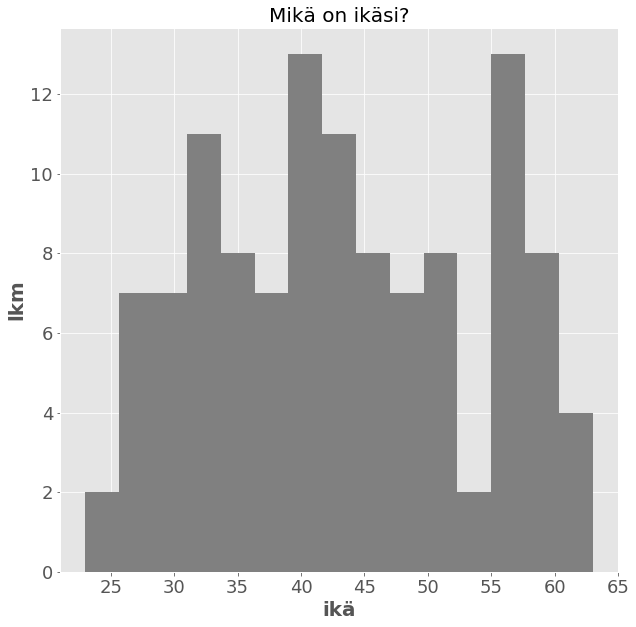

In [37]:
plt.figure(figsize=(10,10))
plt.hist(ammattilaiset_taustat['Mikä on ikäsi? : '], bins=15, color='grey')
plt.tick_params(labelsize=18)
plt.xlabel('ikä', fontsize=20, fontweight='bold')
plt.ylabel('lkm', fontsize=20, fontweight='bold')
plt.title('Mikä on ikäsi?', fontsize=20);

### Käyttökerrat

#### Lasketaan ja visualisoidaan käyttökertoja-koskevien kysymysten tulokset

In [38]:
kayttokerrat = ammattilaiset_taustat['Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?']
kayttokerrat_sum = ammattilaiset_taustat['Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?']

kayttokerrat = kayttokerrat.astype('category')

In [39]:
kayttokerrat = kayttokerrat.map({1: 'Päivittäin', 2: 'Viikottain', 3 : 'Kerran tai kaksi', 4 : 'Harvemmin/kokeillut', 5 : 'En koskaan'})

In [40]:
kayttokerrat.value_counts(normalize=True)

Kerran tai kaksi       0.353448
Viikottain             0.318966
Harvemmin/kokeillut    0.155172
Päivittäin             0.137931
En koskaan             0.034483
Name: Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?, dtype: float64

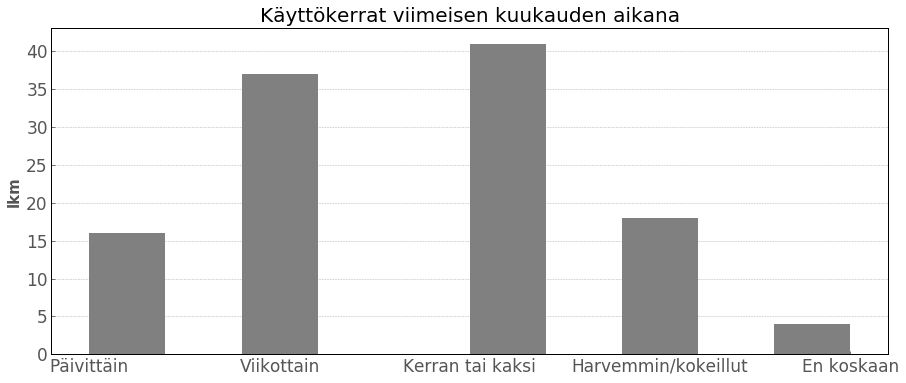

In [41]:
#Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?

plt.style.use("bmh")
plt.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

hist_kayttokerrat = kayttokerrat.hist(figsize=(15, 6), color='grey')
#hist_kayttokerrat.set_title('Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?');

#plt.xlabel('käyttökerrat', fontsize=20, fontweight='bold')

plt.tick_params(labelsize=15)
plt.ylabel('lkm', fontsize=15, fontweight='bold')
plt.title('Käyttökerrat viimeisen kuukauden aikana', fontsize=20);
plt.tick_params(labelsize=17)

axes = plt.gca()
axes.xaxis.grid()

In [42]:
kayttokerrat_sum = pd.DataFrame(kayttokerrat_sum)
#kayttokerrat = osallistuminen_sum.T
kayttokerrat_sum.columns = ["Käyttökerrat"]

### Ammatti

#### Lasketaan ja visualisoidaan vastaajien ammattien jakauma. 1=hoitaja, 2=lääkäri, 3=fysioterapeutti, 4=muu


In [43]:
ammatti = ammattilaiset_taustat['Mikä on ammattisi?']
ammatti = ammatti.astype('category')

ammatti = ammatti.map({1: 'Hoitaja', 2: 'Lääkäri', 3 : 'Fysioterapeutti', 4 : 'Muu'})
ammattilaiset_taustat['Mikä on ammattisi?'].value_counts()

1    84
2    18
3    14
Name: Mikä on ammattisi?, dtype: int64

In [44]:
ammattilaiset_taustat['Mikä on ammattisi?'].value_counts(normalize=True)

1    0.724138
2    0.155172
3    0.120690
Name: Mikä on ammattisi?, dtype: float64

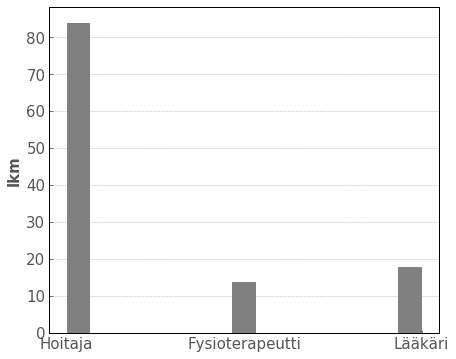

In [45]:

plt.figure(figsize=(7,6))
plt.hist(ammatti, bins=15, color='grey')
plt.tick_params(labelsize=15)
plt.ylabel('lkm', fontsize=15, fontweight='bold')
axes = plt.gca()
axes.xaxis.grid()


In [46]:
data = pd.read_csv('top5_tulokset.csv', delimiter=';')

In [47]:
data.head(25)

,Kysymys,Keski-arvo,Täysin eri mieltä (%),Melko eri mieltä (%),En samaa enkä eri mieltä (%),Melko samaa mieltä (%),Täysin samaa mieltä (%)
0,Esimieheni tukevat oirearvioiden käyttöä,4.24,2,5,14,25,54
1,Ymmärrän organisaatiomme päätöksen ottaa oirea...,4.17,4,9,4,29,53
2,Minua on kannustettu oirearvioiden käyttöön,3.99,4,10,10,35,42
3,Kannatan oirearvioiden käyttöä,3.83,4,17,8,31,39
4,Olen saanut riittävästi perehdytystä oirearvio...,3.74,9,12,7,41,31
5,Oirearvioiden avulla saan enemmän hyödyllistä ...,3.03,15,27,11,35,12
6,"Uskon, että yli puolet kaikista asiakkaista on...",2.87,15,34,15,23,14
7,"Uskon, että yli puolet kaikista asiakkaista os...",2.74,24,28,9,28,11
8,Oirearviot nopeuttavat tehtävieni tekemistä,2.74,24,23,16,27,10
9,Oirearviot lisäävät ammattilaisen työn houkutt...,2.52,24,24,34,15,4


### Työskentelypaikka

#### Lasketaan ja visualisoidaan vastaajien työskentelypaikkojen jakauma. 

In [48]:
tyopaikka = ammattilaiset_taustat['Lähin työskentelypaikkasi?']
tyopaikka = tyopaikka.astype('category')

tyopaikka = tyopaikka.map({1: 'Eksote', 2: 'Helsinki', 3 : 'Hämeenlinna', 4 : 'Joensuu', 5: 'Keski-Suomi', 6: 'Kuopio', 7:'Oulu', 8:'Porvoo', 9:'PHHYKY', 10:'Sondankylä', 11:'Tampere', 12:'Turku', 13:'Muu'})
ammattilaiset_taustat['Lähin työskentelypaikkasi?'].value_counts()

11    30
12    18
7     15
5     12
3     11
4     10
9      9
8      6
1      4
13     1
Name: Lähin työskentelypaikkasi?, dtype: int64

In [49]:
ammattilaiset_taustat['Lähin työskentelypaikkasi?'].value_counts(normalize=True)

11    0.258621
12    0.155172
7     0.129310
5     0.103448
3     0.094828
4     0.086207
9     0.077586
8     0.051724
1     0.034483
13    0.008621
Name: Lähin työskentelypaikkasi?, dtype: float64

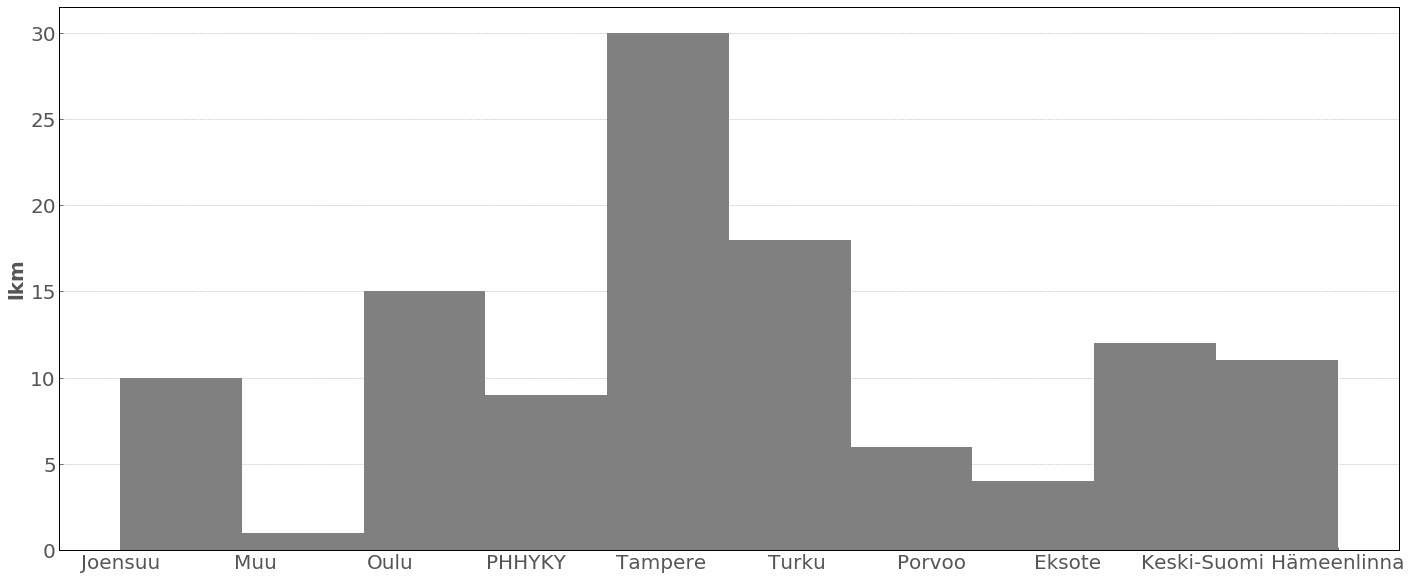

In [50]:
hist_tyopaikka = tyopaikka.hist(figsize=(24, 10), color='grey')
hist_tyopaikka.tick_params(labelsize=20)

plt.ylabel('lkm', fontsize=20, fontweight='bold')

plt.tick_params(labelsize=20)
axes = plt.gca()
axes.xaxis.grid()

### Hyvinvointikeskus

#### Lasketaan ja visualisoidaan vastaajien hyvinvointikeskuksien jakauma. 

In [51]:
hyvinvointikeskus = ammattilaiset_taustat['Missä hyvinvointikeskuksessa pääosin työskentelet?']
hyvinvointikeskus = hyvinvointikeskus.astype('category')

hyvinvointikeskus = hyvinvointikeskus.map({1: 'Kontinkangas', 2: 'Tuira', 3 : 'Kiiminki', 4 : 'Haukipudas', 5: 'Oulunsalo/Kaakkuri', 6: 'Jokin muu'})


### Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen

#### Lasketaan ja visualisoidaan osallistumisen jakauma.

In [52]:
#Olin oirearvioden suunnittelussa mukana

# Siirretään yhdeksän 0-vastausta kolmoseksi
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana'].replace(0, 3, inplace=True)

suunnittelu = ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana']
suunnittelu = suunnittelu.astype('category')

suunnittelu = suunnittelu.map({1: 'Ei', 2: 'Kyllä', 3 : 'En osaa sanoa'})
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana'].value_counts()

1    90
2    16
3    10
Name: Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana, dtype: int64

In [53]:
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana'].value_counts(normalize=True)

1    0.775862
2    0.137931
3    0.086207
Name: Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana, dtype: float64

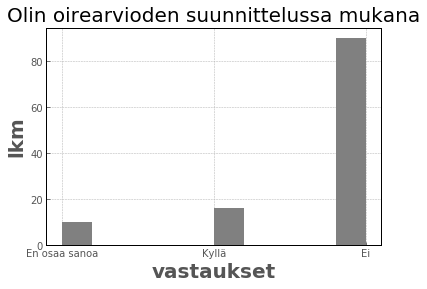

In [54]:
hist_suunnittelu = suunnittelu.hist(color='grey')
#hist_suunnittelu.set_title('Olin oirearvioden suunnittelussa mukana');

plt.xlabel('vastaukset', fontsize=20, fontweight='bold')
plt.ylabel('lkm', fontsize=20, fontweight='bold')
plt.title('Olin oirearvioden suunnittelussa mukana', fontsize=20);

In [55]:
#Olen antanut palautetta

# Siirretään yhdeksän 0-vastausta kolmoseksi
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista'].replace(0, 3, inplace=True)

palaute = ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista']
palaute = palaute.astype('category')

palaute = palaute.map({1: 'Ei', 2: 'Kyllä', 3 : 'En osaa sanoa'})
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista'].value_counts()

2    62
1    45
3     9
Name: Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista, dtype: int64

In [56]:
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista'].value_counts(normalize=True)

2    0.534483
1    0.387931
3    0.077586
Name: Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista, dtype: float64

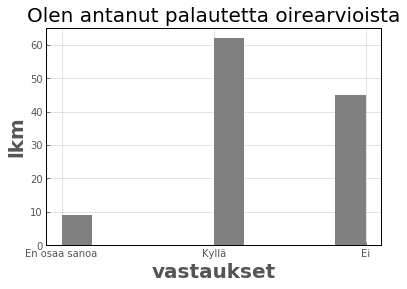

In [57]:
hist_palaute = palaute.hist(color='grey')
#hist_palaute.set_title('Olen antanut palautetta oirearvioista');

plt.xlabel('vastaukset', fontsize=20, fontweight='bold')
plt.ylabel('lkm', fontsize=20, fontweight='bold')
plt.title('Olen antanut palautetta oirearvioista', fontsize=20);

In [58]:
#Olen oirearvioiden pääkäyttäjä tai muu vastaava

# Siirretään yhdeksän 0-vastausta kolmoseksi
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava'].replace(0, 3, inplace=True)

paakayttaja = ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava']
paakayttaja = paakayttaja.astype('category')

paakayttaja = paakayttaja.map({1: 'Ei', 2: 'Kyllä', 3 : 'En osaa sanoa'})
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava'].value_counts()

1    91
2    16
3     9
Name: Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava, dtype: int64

In [59]:
ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava'].value_counts(normalize=True)

1    0.784483
2    0.137931
3    0.077586
Name: Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava, dtype: float64

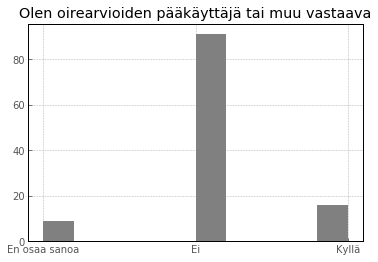

In [60]:
hist_paakayttaja = paakayttaja.hist(color='grey')
hist_paakayttaja.set_title('Olen oirearvioiden pääkäyttäjä tai muu vastaava');

### Oletko kertonut asiakkaille Omaolon oirearvioista?

In [61]:
# Olen suositellut asiakasta käyttämään oirearvioita

suosittelu = ammattilaiset_oletkokertonut['Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen suositellut asiakasta käyttämään oirearvioita']
suosittelu = suosittelu.astype('category')

suosittelu = suosittelu.map({1: '0', 2: '1-3', 3 : '4+'})
ammattilaiset_oletkokertonut['Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen suositellut asiakasta käyttämään oirearvioita'].value_counts()

1    43
3    38
2    35
Name: Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen suositellut asiakasta käyttämään oirearvioita, dtype: int64

In [62]:
# Olen neuvonut asiakasta oirearvioiden käytössä

neuvonta = ammattilaiset_oletkokertonut['Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen neuvonut asiakasta oirearvioiden käytössä']
neuvonta = neuvonta.astype('category')

neuvonta = neuvonta.map({1: '0', 2: '1-3', 3 : '4+'})
ammattilaiset_oletkokertonut['Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen neuvonut asiakasta oirearvioiden käytössä'].value_counts()

1    71
2    24
3    21
Name: Oletko kertonut asiakkaille Omaolon oirearvioista? : Olen neuvonut asiakasta oirearvioiden käytössä, dtype: int64

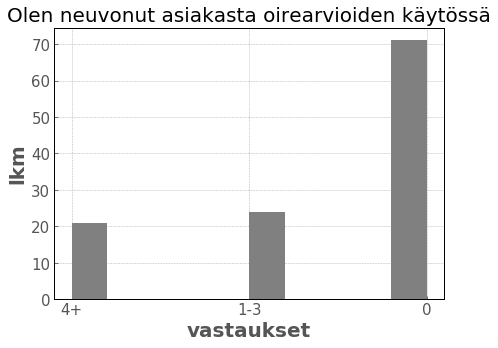

In [63]:
hist_neuvonta = neuvonta.hist(figsize=(7, 5), color='grey')
hist_neuvonta.tick_params(labelsize=15)

plt.xlabel('vastaukset', fontsize=20, fontweight='bold')
plt.ylabel('lkm', fontsize=20, fontweight='bold')
plt.title('Olen neuvonut asiakasta oirearvioiden käytössä', fontsize=20);

In [64]:
suosittelu = suosittelu.sort_values()
#neuvonta = neuvonta.map({1: '0 kertaa', 2: '1-3 kertaa', 3 : '4+ kertaa'})
neuvonta = neuvonta.sort_values()

In [65]:
#?plt.subplot

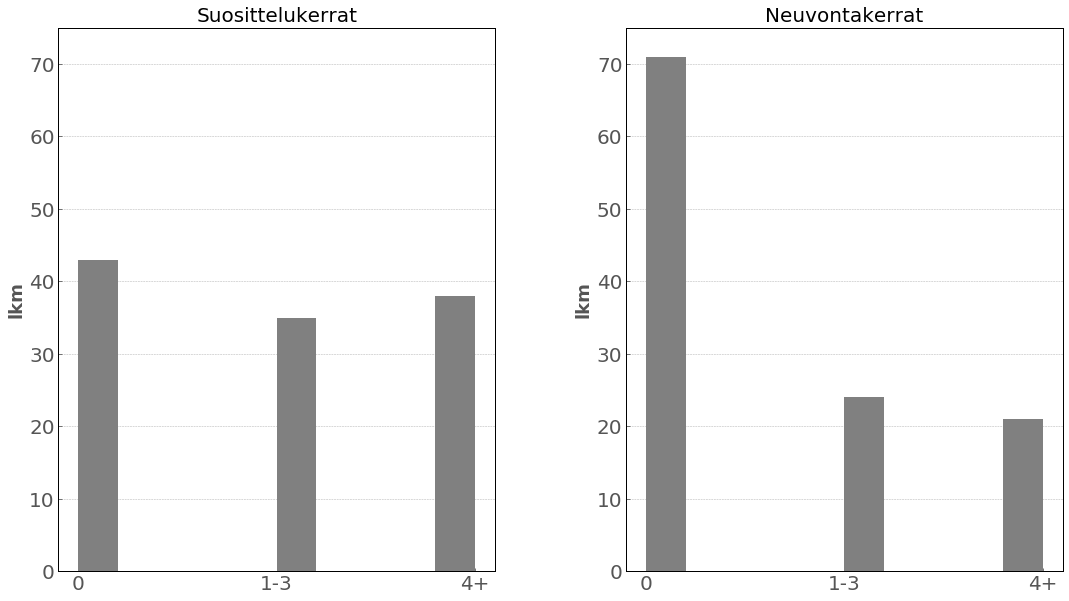

In [66]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.3)
plt.ylim((0, 75));

plt.hist(suosittelu, color='grey');

plt.tick_params(labelsize=20)
plt.ylabel('lkm', fontsize=18, fontweight='bold')
plt.title('Suosittelukerrat', fontsize=20);

axes = plt.gca()
axes.xaxis.grid()

plt.subplot(1, 2, 2)
plt.ylim((0, 75));

plt.hist(neuvonta, color='grey');

plt.tick_params(labelsize=20)
plt.ylabel('lkm', fontsize=18, fontweight='bold')
plt.title('Neuvontakerrat', fontsize=20);
axes = plt.gca()
axes.xaxis.grid()

#### Muutetaan kysymyksen "Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa" vastausasteikko päinvastaiseksi, koska kysymys on aseteltu erilailla kuin muut.

In [67]:

def change_scale(answer):
    if answer == 'nan':
        return answer
    else:
        return 6 - answer

In [68]:
column = 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa'
ammattilaiset[column] = ammattilaiset[column].apply(change_scale)

## Data, jossa korvataan nan-arvot sarakkeiden mediaanilla

In [69]:
# Otetaan taulukosta kopio ja korvataan nan-arvot sarakkeiden mediaanilla eli kolmosella.

ammattilaiset_med = ammattilaiset.copy(deep=True)
ammattilaiset_med.replace(np.nan, 3, inplace=True)
ammattilaiset_med.shape

(116, 22)

## Cronbach's alpha

#### Tähän alle on listattu käytettävissä olevat komennot sekä linkki ohjeeseen.

https://pingouin-stats.org/generated/pingouin.cronbach_alpha.html

#### Kokeillaan cronbach_alphaa koko datasetille kolmella eri vaihtoehdolla. Ensimmäinen pitää nan-arvot mukana, toinen vaihtoehto ei laske rivejä joilla on nan-arvo ja kolmas vaihtoehto korvaa nan-arvot sarakkeen mediaanilla.

In [70]:
pg.cronbach_alpha(data=ammattilaiset)

(0.9128434776883003, array([0.888, 0.934]))

In [71]:
#After listwise deletion of missing values (remove the entire rows)
pg.cronbach_alpha(data=ammattilaiset, nan_policy='listwise')

(0.9121775965064527, array([0.887, 0.934]))

In [72]:
#After imputing the missing values with the median of each column
pg.cronbach_alpha(data=ammattilaiset.fillna(ammattilaiset.median()))

(0.9072425051944198, array([0.881, 0.93 ]))

### Lasketaan kysymyssettikohtaiset cronbach_alpha-arvot.
#### Käytetään komentoa, joka poistaa nan-arvolliset rivit. 

In [73]:
pg.cronbach_alpha(data=ammattilaiset[['Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Työkaverini kannattavat oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Esimieheni tukevat oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Ymmärrän organisaatiomme päätöksen ottaa oirearviot käyttöön']], nan_policy='listwise')

(0.8029907193152696, array([0.737, 0.856]))

In [74]:
pg.cronbach_alpha(data=ammattilaiset[['Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot nopeuttavat tehtävieni tekemistä', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla saan enemmän hyödyllistä tietoa asiakkaasta', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla hoidon tarpeen arviointi on tasalaatuista', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot lisäävät ammattilaisen työn houkuttelevuutta']], nan_policy='listwise')

(0.8875746204375734, array([0.85 , 0.918]))

In [75]:
pg.cronbach_alpha(data=ammattilaiset[['Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani hallita asiakasprosessia', 'Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani ammatilliseen harkintaan työssäni']], nan_policy='listwise')

(0.8705200874215964, array([0.813, 0.91 ]))

In [76]:
pg.cronbach_alpha(data=ammattilaiset[['Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Oirearvioiden avulla asiakkaat saavat nopeasti apua', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista on halukkaita käyttämään oirearvioita', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista osaa käyttää oirearvioita', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Kokemukseni mukaan asiakkaat ymmärtävät oirearvioiden antamat ohjeet']], nan_policy='listwise')

(0.8282238442822384, array([0.771, 0.874]))

In [77]:
pg.cronbach_alpha(data=ammattilaiset_oletkokertonut)

(0.7945854948981343, array([0.703, 0.858]))

In [78]:
# Kysymykselle "'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa'"
# tehtiin aikaisemmin käännetty koodaus.

pg.cronbach_alpha(data=ammattilaiset[['Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearviot vastaavat vaatimuksiani', 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa', 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioita on helppo käyttää']], nan_policy='listwise')

(0.7584242424242422, array([0.671, 0.826]))

In [79]:
pg.cronbach_alpha(data=ammattilaiset[['Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut rittävästi tietoa siitä, mitä hyötyä oirearvioista on', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Minua on kannustettu oirearvioiden käyttöön', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi perehdytystä oirearvioiden käyttöön', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi tietoa, miten oirearvioista voi antaa palautetta', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Saan riittävästi apua, jos oirearvioiden käytössä ilmenee ongelmia']], nan_policy='listwise')

(0.848695677623278, array([0.8  , 0.888]))

#### Cronbach's alphaa laskiessa rivit, joissa oli nan-arvo, tiputettiin pois. Tästä huolimatta jokaisessa cronbach_alpha-testatussa kysymyssetissä oli vähintään 92 riviä.

### Summamuuttujien arvojen lokerointi

In [80]:
bins_2 = [0, 2, 4, 6, 8, 10]
bins_3 = [0, 4, 7, 10, 13, 15]
bins_4 = [0, 5, 9, 13, 17, 20]
bins_5 = [0, 7, 12, 17, 22, 25]
names = ['--', '-', '0', '+', '++']

### Summamuuttujien keskiarvot ja keskihajonnat

#### Mitä mieltä olet oirearvioiden käytöstä työssäsi?

In [81]:
# Lasketaan summamuuttuja kysymyksistä

ammattilaiset_mitämieltä = ammattilaiset[['Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Työkaverini kannattavat oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Esimieheni tukevat oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Ymmärrän organisaatiomme päätöksen ottaa oirearviot käyttöön']]

ammattilaiset_mitämieltä_med = ammattilaiset_med[['Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Kannatan oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Työkaverini kannattavat oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Esimieheni tukevat oirearvioiden käyttöä', 'Mitä mieltä olet Omaolon oirearvioiden käytöstä työssäsi? : Ymmärrän organisaatiomme päätöksen ottaa oirearviot käyttöön']]


ammattilaiset_mitämieltä_med_sum = [ammattilaiset_mitämieltä_med.sum(axis=1, skipna=True)]
ammattilaiset_mitämieltä_med_sum = pd.DataFrame(ammattilaiset_mitämieltä_med_sum)
ammattilaiset_mitämieltä_med_sum = ammattilaiset_mitämieltä_med_sum.T
ammattilaiset_mitämieltä_med_sum.columns = ["Kannatus"]

ammattilaiset_mitämieltä_med_sum.shape

(116, 1)

In [82]:
#Keskiarvo

ammattilaiset_mitämieltä.mean(axis=1, skipna=True).mean(axis=0, skipna=True)


3.8789855072463766

In [83]:
#Keskihajonta

pd.DataFrame(ammattilaiset_mitämieltä.values.flatten()).std(skipna=True)

0    1.193109
dtype: float64

In [84]:
# Summamuuttujan arvojen kategorisoiminen

ammattilaiset_mitämieltä_med_sum_bins = pd.cut(ammattilaiset_mitämieltä_med_sum['Kannatus'], bins=bins_4, labels=names)

ammattilaiset_mitämieltä_med_sum_bins = pd.DataFrame(ammattilaiset_mitämieltä_med_sum_bins)

#### Arvioi Omaolon oirearvioita työsi kannalta:

In [85]:
# Lasketaan summamuuttuja kysymyksistä

ammattilaiset_arvioi=ammattilaiset[['Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot nopeuttavat tehtävieni tekemistä', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla saan enemmän hyödyllistä tietoa asiakkaasta', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla hoidon tarpeen arviointi on tasalaatuista', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot lisäävät ammattilaisen työn houkuttelevuutta']]

ammattilaiset_arvioi_med = ammattilaiset_med[['Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot nopeuttavat tehtävieni tekemistä', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla saan enemmän hyödyllistä tietoa asiakkaasta', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearvioiden avulla hoidon tarpeen arviointi on tasalaatuista', 'Arvioi Omaolon oirearvioita työsi kannalta: : Oirearviot lisäävät ammattilaisen työn houkuttelevuutta']]

ammattilaiset_arvioi_med_sum = [ammattilaiset_arvioi_med.sum(axis=1, skipna=True)]
ammattilaiset_arvioi_med_sum = pd.DataFrame(ammattilaiset_arvioi_med_sum)
ammattilaiset_arvioi_med_sum = ammattilaiset_arvioi_med_sum.T
ammattilaiset_arvioi_med_sum.columns = ["Hyödyt omalle työlle"]


In [86]:
# Summamuuttujan keskiarvo
ammattilaiset_arvioi.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

2.872844827586207

In [87]:
# Summamuuttujan keskihajonta
pd.DataFrame(ammattilaiset_arvioi.values.flatten()).std(skipna=True)

0    1.291286
dtype: float64

In [88]:
#Summamuuttujan arvojen kategorisoiminen

ammattilaiset_arvioi_med_sum_bins = pd.cut(ammattilaiset_arvioi_med_sum['Hyödyt omalle työlle'], bins_4, labels=names)

ammattilaiset_arvioi_med_sum_bins = pd.DataFrame(ammattilaiset_arvioi_med_sum_bins)


#### Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi:

In [89]:
# Lasketaan summamuuttuja kysymyksistä

ammattilaiset_ammattirooli = ammattilaiset[['Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani hallita asiakasprosessia', 'Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani ammatilliseen harkintaan työssäni']]

ammattilaiset_ammattirooli_med = ammattilaiset_med[['Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani hallita asiakasprosessia', 'Arvioi Omaolon oirearvioiden vaikutusta ammattirooliisi: : Oirearviot vähentävät mahdollisuuksiani ammatilliseen harkintaan työssäni']]


ammattilaiset_ammattirooli_med_sum = [ammattilaiset_ammattirooli_med.sum(axis=1, skipna=True)]
ammattilaiset_ammattirooli_med_sum = pd.DataFrame(ammattilaiset_ammattirooli_med_sum)
ammattilaiset_ammattirooli_med_sum = ammattilaiset_ammattirooli_med_sum.T
ammattilaiset_ammattirooli_med_sum.columns = ["Vaikutus ammattirooliin"]


In [90]:
# Summamuuttujan keskiarvo
ammattilaiset_ammattirooli.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

2.685840707964602

In [91]:
# Summamuuttujan keskihajonta
pd.DataFrame(ammattilaiset_ammattirooli.values.flatten()).std(skipna=True)

0    1.130388
dtype: float64

In [92]:
names_2 = ['++', '+', '0', '-', '--']

ammattilaiset_ammattirooli_med_sum_bins = pd.cut(ammattilaiset_ammattirooli_med_sum['Vaikutus ammattirooliin'], bins_2, labels=names_2)

ammattilaiset_ammattirooli_med_sum_bins = pd.DataFrame(ammattilaiset_ammattirooli_med_sum_bins)


#### Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin:

In [93]:
# Lasketaan summamuuttuja kysymyksistä

ammattilaiset_asiakkaat = ammattilaiset[['Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Oirearvioiden avulla asiakkaat saavat nopeasti apua', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista on halukkaita käyttämään oirearvioita', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista osaa käyttää oirearvioita', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Kokemukseni mukaan asiakkaat ymmärtävät oirearvioiden antamat ohjeet']]

ammattilaiset_asiakkaat_med = ammattilaiset_med[['Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Oirearvioiden avulla asiakkaat saavat nopeasti apua', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista on halukkaita käyttämään oirearvioita', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Uskon, että yli puolet kaikista asiakkaista osaa käyttää oirearvioita', 'Arvioi Omaolon oirearvioiden vaikutusta yksikkösi asiakkaisiin: : Kokemukseni mukaan asiakkaat ymmärtävät oirearvioiden antamat ohjeet']]


ammattilaiset_asiakkaat_med_sum = [ammattilaiset_asiakkaat_med.sum(axis=1, skipna=True)]
ammattilaiset_asiakkaat_med_sum = pd.DataFrame(ammattilaiset_asiakkaat_med_sum)
ammattilaiset_asiakkaat_med_sum = ammattilaiset_asiakkaat_med_sum.T
ammattilaiset_asiakkaat_med_sum.columns = ["Vaikutus asiakkaisiin"]


In [94]:
# Summamuuttujan keskiarvo
ammattilaiset_asiakkaat.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

3.114492753623188

In [95]:
# Summamuuttujan keskihajonta
pd.DataFrame(ammattilaiset_asiakkaat.values.flatten()).std(skipna=True)

0    1.3023
dtype: float64

In [96]:
ammattilaiset_asiakkaat_med_sum_bins = pd.cut(ammattilaiset_asiakkaat_med_sum['Vaikutus asiakkaisiin'], bins_4, labels=names)

ammattilaiset_asiakkaat_med_sum_bins = pd.DataFrame(ammattilaiset_asiakkaat_med_sum_bins)


#### Oletko kertonut asiakkaille Omaolon oirearvioista?

In [97]:
#ammattilaiset_oletkokertonut.dropna()


ammattilaiset_kertonut_med_sum = [ammattilaiset_oletkokertonut.sum(axis=1, skipna=True)]
ammattilaiset_kertonut_med_sum = pd.DataFrame(ammattilaiset_kertonut_med_sum)
ammattilaiset_kertonut_med_sum = ammattilaiset_kertonut_med_sum.T
ammattilaiset_kertonut_med_sum.columns = ["Asiakkaille kertominen"]


In [98]:
# Summamuuttujan keskiarvo
ammattilaiset_oletkokertonut.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

1.7629310344827587

In [99]:
# Summamuuttujan keskihajonta
pd.DataFrame(ammattilaiset_oletkokertonut.values.flatten()).std(skipna=True)

0    0.832149
dtype: float64

In [100]:
bins_3_2 = [0, 2, 4, 6]
names_3 = ['En', '1-3', '4+']

ammattilaiset_kertonut_med_sum_bins = pd.cut(ammattilaiset_kertonut_med_sum["Asiakkaille kertominen"], bins_3_2, labels=names_3)

ammattilaiset_kertonut_med_sum_bins = pd.DataFrame(ammattilaiset_kertonut_med_sum_bins)


#### Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: 

In [101]:
# Lasketaan summamuuttuja kysymyksistä

ammattilaiset_käytettävyys = ammattilaiset[['Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearviot vastaavat vaatimuksiani', 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa', 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioita on helppo käyttää']]

ammattilaiset_käytettävyys_med = ammattilaiset_med[['Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearviot vastaavat vaatimuksiani', 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioiden käyttö on turhauttavaa', 'Arvioi millaista Omaolon oirearvioiden käyttö on työssäsi: : Oirearvioita on helppo käyttää']]


ammattilaiset_käytettävyys_med_sum = [ammattilaiset_käytettävyys_med.sum(axis=1, skipna=True)]
ammattilaiset_käytettävyys_med_sum = pd.DataFrame(ammattilaiset_käytettävyys_med_sum)
ammattilaiset_käytettävyys_med_sum = ammattilaiset_käytettävyys_med_sum.T
ammattilaiset_käytettävyys_med_sum.columns = ["Käytettävyys"]


In [102]:
# Summamuuttujan keskiarvo
ammattilaiset_käytettävyys.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

3.323099415204678

In [103]:
# Summamuuttujan keskihajonta
pd.DataFrame(ammattilaiset_käytettävyys.values.flatten()).std(skipna=True)

0    1.218789
dtype: float64

In [104]:
ammattilaiset_käytettävyys_med_sum_bins = pd.cut(ammattilaiset_käytettävyys_med_sum['Käytettävyys'], bins_3, labels=names)

ammattilaiset_käytettävyys_med_sum_bins = pd.DataFrame(ammattilaiset_käytettävyys_med_sum_bins)


#### Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön?

In [105]:
# Lasketaan summamuuttuja kysymyksistä

ammattilaiset_perehdytys = ammattilaiset[['Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut rittävästi tietoa siitä, mitä hyötyä oirearvioista on', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Minua on kannustettu oirearvioiden käyttöön', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi perehdytystä oirearvioiden käyttöön', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi tietoa, miten oirearvioista voi antaa palautetta', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Saan riittävästi apua, jos oirearvioiden käytössä ilmenee ongelmia']]

ammattilaiset_perehdytys_med = ammattilaiset_med[['Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut rittävästi tietoa siitä, mitä hyötyä oirearvioista on', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Minua on kannustettu oirearvioiden käyttöön', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi perehdytystä oirearvioiden käyttöön', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Olen saanut riittävästi tietoa, miten oirearvioista voi antaa palautetta', 'Oletko saanut tukea Omaolon oirearvioiden ammattilaisosion käyttöön? : Saan riittävästi apua, jos oirearvioiden käytössä ilmenee ongelmia']]


ammattilaiset_perehdytys_med_sum = [ammattilaiset_perehdytys_med.sum(axis=1, skipna=True)]
ammattilaiset_perehdytys_med_sum = pd.DataFrame(ammattilaiset_perehdytys_med_sum)
ammattilaiset_perehdytys_med_sum = ammattilaiset_perehdytys_med_sum.T
ammattilaiset_perehdytys_med_sum.columns = ["Saatu perehdytys"]


In [106]:
# Summamuuttujan keskiarvo
ammattilaiset_perehdytys.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

3.6258620689655165

In [107]:
# Summamuuttujan keskihajonta
pd.DataFrame(ammattilaiset_perehdytys.values.flatten()).std(skipna=True)

0    1.290156
dtype: float64

In [108]:
ammattilaiset_perehdytys_med_sum_bins = pd.cut(ammattilaiset_perehdytys_med_sum['Saatu perehdytys'], bins_5, labels=names)

ammattilaiset_perehdytys_med_sum_bins = pd.DataFrame(ammattilaiset_perehdytys_med_sum_bins)


### Suunnitteluun osallistuminen

In [109]:
suunnittelu = pd.DataFrame(ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olin oirearvioden suunnittelussa mukana'])
pääkäyttäjä = pd.DataFrame(ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen oirearvioiden pääkäyttäjä tai muu vastaava'])
palaute = pd.DataFrame(ammattilaiset_taustat['Oletko osallistunut Oirearvioiden kehittämiseen tai tukeen? : Olen antanut palautetta oirearvioista'])

osallistuminen = suunnittelu.join(pääkäyttäjä)
osallistuminen = osallistuminen.join(palaute)
osallistuminen.replace(3, 0, inplace=True)

# Summamuuttuja

osallistuminen_sum = [osallistuminen.sum(axis=1, skipna=False)]
osallistuminen_sum = pd.DataFrame(osallistuminen_sum)
osallistuminen_sum = osallistuminen_sum.T
osallistuminen_sum.columns = ["Osallistuminen"]

In [110]:
# Summamuuttujan keskiarvo
osallistuminen_sum.mean(axis=1, skipna=True).mean(axis=0, skipna=True)

3.5689655172413794

In [111]:
# Summamuuttujan keskihajonta
pd.DataFrame(osallistuminen_sum.values.flatten()).std(skipna=True)

0    1.320238
dtype: float64

In [112]:
# Kategoriointi

bins_2_2 = [-1, 2, 4, 6]
names3 = ['0', 'Ei', 'Kyllä']

osallistuminen_sum_bins = pd.cut(osallistuminen_sum['Osallistuminen'], bins_2_2, labels=names3)

osallistuminen_sum_bins = pd.DataFrame(osallistuminen_sum_bins)
osallistuminen_sum_bins.replace(np.nan, 'Ei', inplace=True)

### Korrelaatio
Seuraavaksi lasketaan ja visualisoidaan korrelaatiomatriisi

In [113]:
# Tuodaan data

# Setti, josta on poistettu avoimet vastaukset ja terveys/hyvinvointikeskus
ammattilaiset_corr_all = pd.read_csv('ammattilaiset_korrelaatio_eiavoimet.csv', delimiter=';')

# Setti, josta on lisäksi poistettu: taustatiedot
ammattilaiset_corr = pd.read_csv('ammattilaiset_korrelaatio_eiavoimet_eitaustat.csv', delimiter=';')

In [114]:
# Esikäsittely
ammattilaiset_corr_all = ammattilaiset_corr_all.drop([0, 5], axis=0)
ammattilaiset_corr_all.replace(6, np.nan, inplace=True)
ammattilaiset_corr_all['Mikä on sukupuolesi?'].replace(0, 3, inplace=True)
ammattilaiset_corr_all.dropna(inplace=True)

column = 'Oirearvioiden käyttö on turhauttavaa'
ammattilaiset_corr_all[column] = ammattilaiset_corr_all[column].apply(change_scale)

column = 'Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?'
ammattilaiset_corr_all[column] = ammattilaiset_corr_all[column].apply(change_scale)

In [115]:
# Esikäsittely
ammattilaiset_corr = ammattilaiset_corr.drop([0, 5], axis=0)
ammattilaiset_corr.replace(6, np.nan, inplace=True)
ammattilaiset_corr.dropna(inplace=True)

column = 'Oirearvioiden käyttö on turhauttavaa'
ammattilaiset_corr[column] = ammattilaiset_corr[column].apply(change_scale)

column = 'Kuinka paljon olet käyttänyt Omaolon oirearvioita työssäsi viimeisen kuukauden aikana?'
ammattilaiset_corr_all[column] = ammattilaiset_corr_all[column].apply(change_scale)

In [116]:
# Korrelaatio lasketaan Pearsonin 
# Pearson correlation measures the linear association between continuous variables. 
# In other words, this coefficient quantifies the degree to which a relationship between two variables can be described 
# by a line.
# Correlation will always fall between -1 and 1.


corrMatrix_all = ammattilaiset_corr_all.corr('spearman')
print (corrMatrix_all)

                                                    Kannatan oirearvioiden käyttöä  \
Kannatan oirearvioiden käyttöä                                            1.000000   
Työkaverini kannattavat oirearvioiden käyttöä                             0.722238   
Esimieheni tukevat oirearvioiden käyttöä                                  0.296204   
Ymmärrän organisaatiomme päätöksen ottaa oirear...                        0.666815   
Oirearviot nopeuttavat tehtävieni tekemistä                               0.692490   
Oirearvioiden avulla saan enemmän hyödyllistä t...                        0.668732   
Oirearvioiden avulla hoidon tarpeen arviointi o...                        0.652367   
Oirearviot lisäävät ammattilaisen työn houkutte...                        0.700670   
Oirearviot vähentävät mahdollisuuksiani hallita...                       -0.321907   
Oirearviot vähentävät mahdollisuuksiani ammatil...                       -0.297792   
Oirearvioiden avulla asiakkaat saavat nopeasti ...    

In [117]:
corrMatrix = ammattilaiset_corr.corr('spearman')

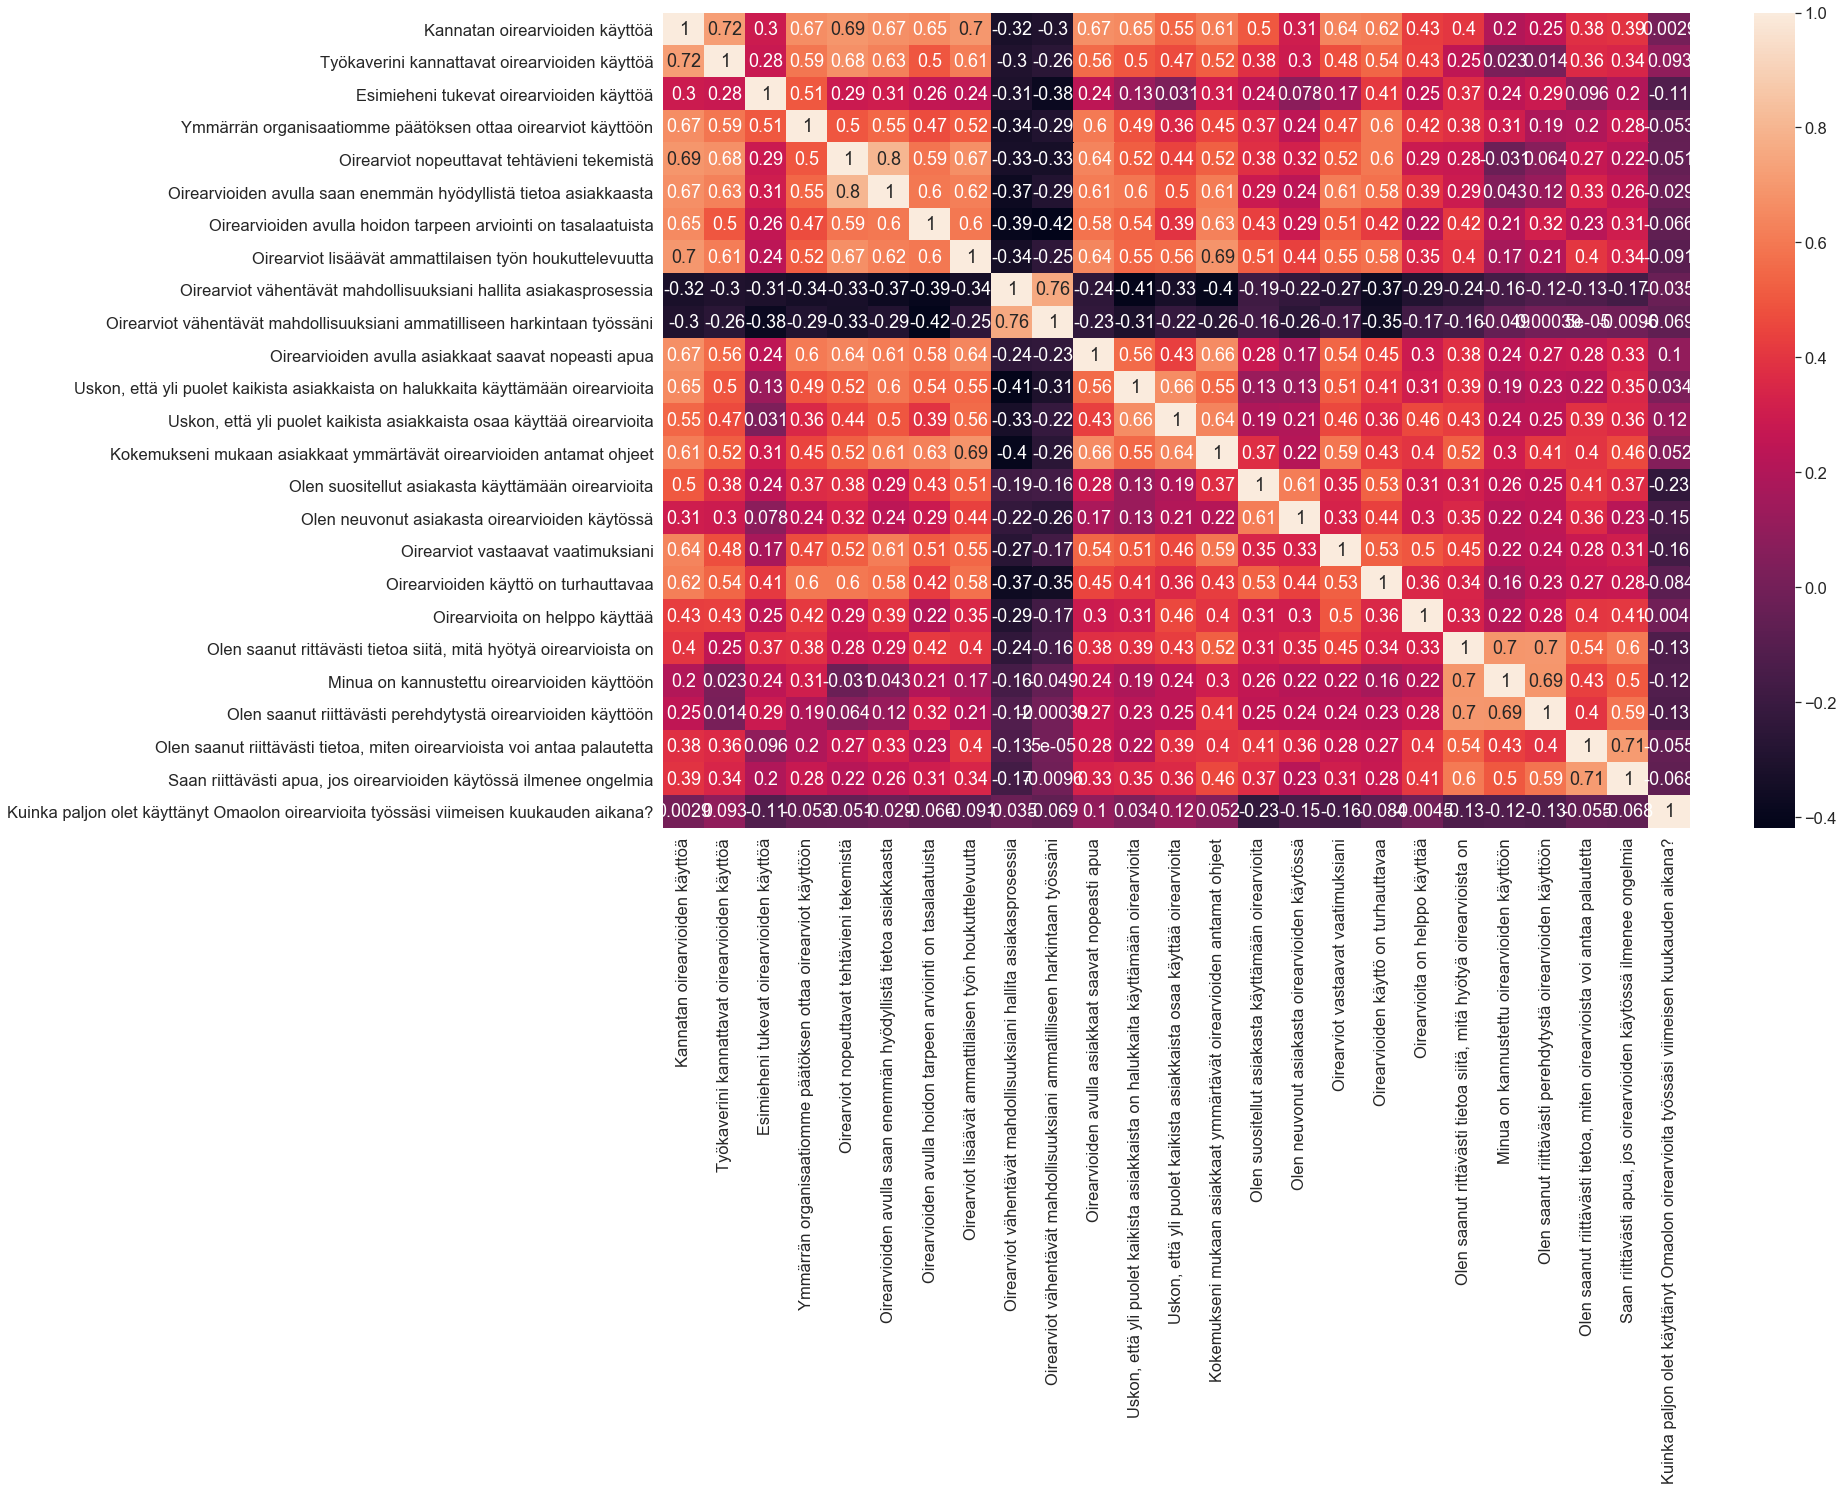

In [118]:
# Pienemmän matriisin visualisointi, josta on poistettu taustatiedot

plt.figure(figsize=(23,15))

sn.set(font_scale=1.5)
sn.heatmap(corrMatrix, annot=True, xticklabels=True, yticklabels=True)
plt.show()



In [119]:
# Tutkitaan kannatuksen saraketta

corr_kannatus = corrMatrix_all['Kannatan oirearvioiden käyttöä']
corr_kannatus = corr_kannatus.sort_values(ascending=False)
print(corr_kannatus)

Kannatan oirearvioiden käyttöä                                                            1.000000
Työkaverini kannattavat oirearvioiden käyttöä                                             0.722238
Oirearviot lisäävät ammattilaisen työn houkuttelevuutta                                   0.700670
Oirearviot nopeuttavat tehtävieni tekemistä                                               0.692490
Oirearvioiden avulla saan enemmän hyödyllistä tietoa asiakkaasta                          0.668732
Oirearvioiden avulla asiakkaat saavat nopeasti apua                                       0.668000
Ymmärrän organisaatiomme päätöksen ottaa oirearviot käyttöön                              0.666815
Oirearvioiden avulla hoidon tarpeen arviointi on tasalaatuista                            0.652367
Uskon, että yli puolet kaikista asiakkaista on halukkaita käyttämään oirearvioita         0.651108
Oirearviot vastaavat vaatimuksiani                                                        0.635308
Oirearvioi

### Summamuuttujien korrelaatio

Tehdään summamuuttujista oma taulukko ja lasketaan korrelaatio sarakekohtaisesti

In [120]:
summamuuttujat = ammattilaiset_mitämieltä_med_sum.join(ammattilaiset_arvioi_med_sum)
summamuuttujat = summamuuttujat.join(ammattilaiset_ammattirooli_med_sum)
summamuuttujat = summamuuttujat.join(ammattilaiset_asiakkaat_med_sum)
summamuuttujat = summamuuttujat.join(ammattilaiset_kertonut_med_sum)
summamuuttujat = summamuuttujat.join(ammattilaiset_käytettävyys_med_sum)
summamuuttujat = summamuuttujat.join(ammattilaiset_perehdytys_med_sum)
summamuuttujat = summamuuttujat.join(osallistuminen_sum)
summamuuttujat = summamuuttujat.join(kayttokerrat_sum)



In [121]:
corrMatrix_sum = summamuuttujat.corr('spearman')

corrMatrix_sum.to_numpy().flatten()

array([ 1.00000000e+00,  7.72103030e-01, -4.37828280e-01,  6.62484147e-01,
        3.46669566e-01,  7.61511278e-01,  4.13426117e-01,  9.12183648e-02,
        5.24126775e-02,  7.72103030e-01,  1.00000000e+00, -4.35856365e-01,
        7.46774038e-01,  3.65080226e-01,  7.37559672e-01,  4.34233667e-01,
       -5.28011550e-02,  5.07532909e-02, -4.37828280e-01, -4.35856365e-01,
        1.00000000e+00, -3.39668097e-01, -1.83500467e-01, -4.51309233e-01,
       -8.93049326e-02,  1.08689003e-01, -9.43878129e-02,  6.62484147e-01,
        7.46774038e-01, -3.39668097e-01,  1.00000000e+00,  2.12131290e-01,
        6.49568913e-01,  5.27667785e-01, -6.57009487e-02,  1.04562485e-01,
        3.46669566e-01,  3.65080226e-01, -1.83500467e-01,  2.12131290e-01,
        1.00000000e+00,  3.82087993e-01,  3.64727618e-01,  8.64831189e-02,
       -3.30385432e-01,  7.61511278e-01,  7.37559672e-01, -4.51309233e-01,
        6.49568913e-01,  3.82087993e-01,  1.00000000e+00,  4.75911825e-01,
        8.42483262e-02,  

In [122]:
summamuuttujat.shape

(116, 9)

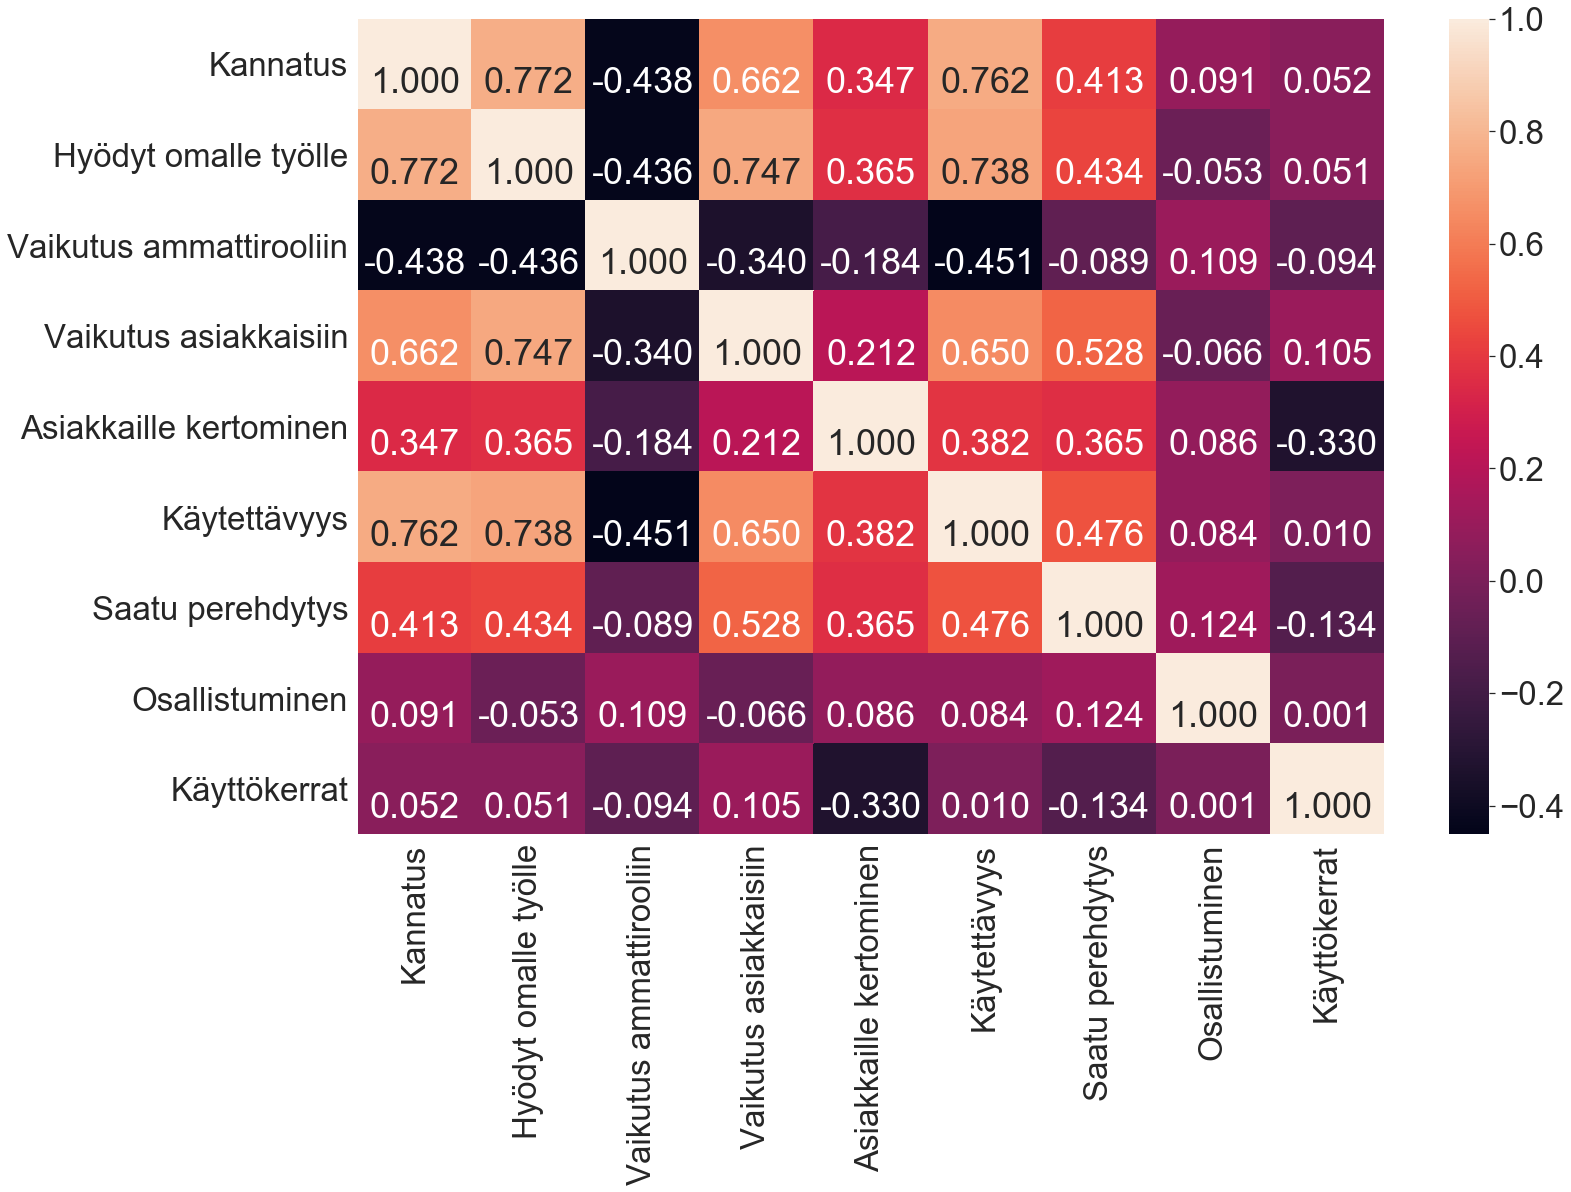

In [123]:
plt.figure(figsize=(23,15))
sn.set(font_scale=3)

#Tässä voisi lisätä tähdet osoittamaan tilastollista merkitsevyyttä
text = np.asarray([['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '']])
labels = (np.asarray(["{0}\n{1:.3f}".format(text,corrMatrix_sum) for text, corrMatrix_sum in zip(text.flatten(), corrMatrix_sum.to_numpy().flatten())])).reshape(9,9)

sn.heatmap(corrMatrix_sum, annot=labels, fmt='', xticklabels=True, yticklabels=True) # cmap='binary')

plt.show()

In [124]:
# Tutkitaan kannatuksen saraketta

corr_sum_kannatus = corrMatrix_sum['Kannatus']
corr_sum_kannatus = corr_sum_kannatus.sort_values(ascending=False)
corr_sum_kannatus

Kannatus                   1.000000
Hyödyt omalle työlle       0.772103
Käytettävyys               0.761511
Vaikutus asiakkaisiin      0.662484
Saatu perehdytys           0.413426
Asiakkaille kertominen     0.346670
Osallistuminen             0.091218
Käyttökerrat               0.052413
Vaikutus ammattirooliin   -0.437828
Name: Kannatus, dtype: float64

In [125]:
# Lasketaan merkittävyys eli corr^2

merk_sum_kannatus = corr_sum_kannatus

merk_sum_kannatus = merk_sum_kannatus.pow(2)
    
merk_sum_kannatus

Kannatus                   1.000000
Hyödyt omalle työlle       0.596143
Käytettävyys               0.579899
Vaikutus asiakkaisiin      0.438885
Saatu perehdytys           0.170921
Asiakkaille kertominen     0.120180
Osallistuminen             0.008321
Käyttökerrat               0.002747
Vaikutus ammattirooliin    0.191694
Name: Kannatus, dtype: float64

### Käyttöajan ja iän vaikutus kannatukseen

In [126]:
kayttoaika_ika = pd.read_csv('käyttoaika_ika.csv', delimiter=';')

In [127]:
kayttoaika_ika = kayttoaika_ika.drop([0, 5], axis=0)

In [128]:
kayttoaika = kayttoaika_ika[['Käyttöaika']]
ika = kayttoaika_ika[['Ikä']]

In [129]:
summa_kaytto2 = ika.join(kayttoaika)

In [130]:
summa_kaytto = ammattilaiset_mitämieltä_med_sum.join(ammattilaiset_arvioi_med_sum)
summa_kaytto = summa_kaytto.join(ammattilaiset_ammattirooli_med_sum)
summa_kaytto = summa_kaytto.join(ammattilaiset_asiakkaat_med_sum)
summa_kaytto = summa_kaytto.join(ammattilaiset_käytettävyys_med_sum)
summa_kaytto = summa_kaytto.join(ammattilaiset_perehdytys_med_sum)
summa_kaytto = summa_kaytto.join(osallistuminen_sum)
summa_kaytto = summa_kaytto.join(summa_kaytto2)

In [131]:
summa_kaytto.shape

(116, 9)

In [132]:
corrMatrix_kayt = summa_kaytto.corr('pearson')

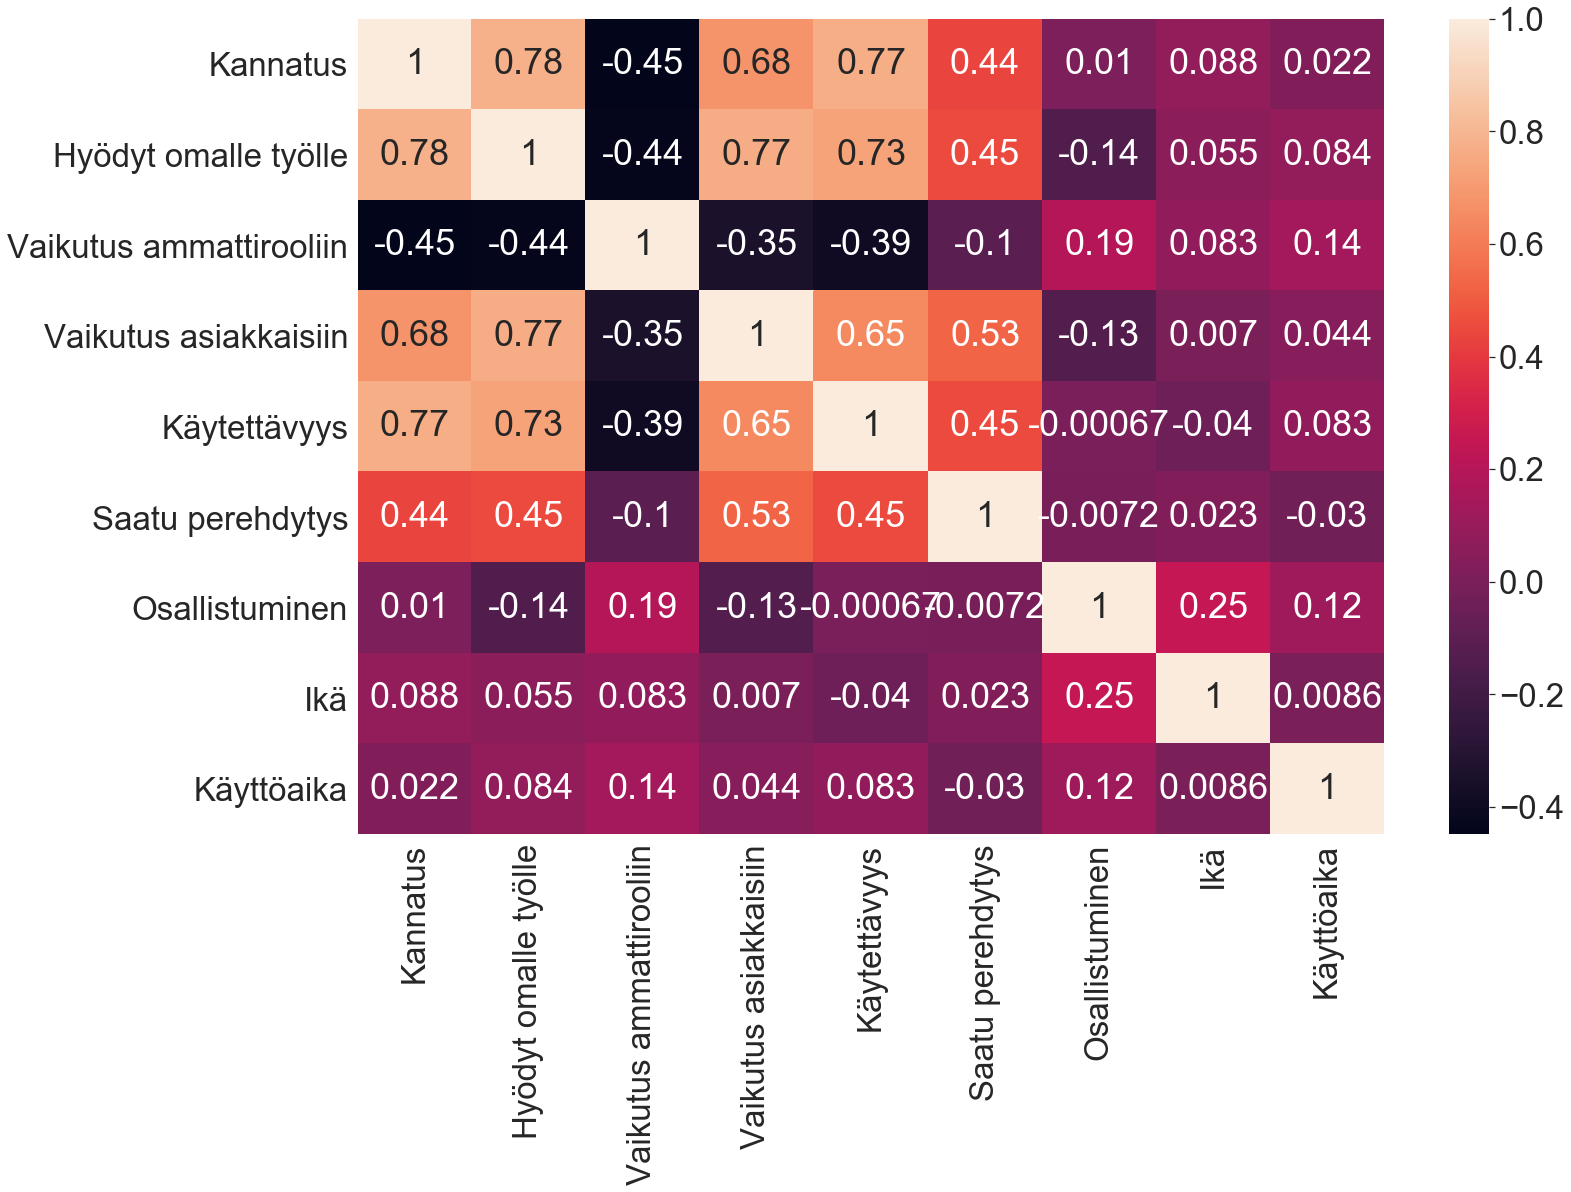

In [133]:
plt.figure(figsize=(23,15))
sn.set(font_scale=3)
sn.heatmap(corrMatrix_kayt, annot=True, xticklabels=True, yticklabels=True)
plt.show()


In [134]:
# Tutkitaan kannatuksen saraketta

corr_kayt_kannatus = corrMatrix_kayt['Kannatus']
corr_kayt_kannatus = corr_kayt_kannatus.sort_values(ascending=False)
corr_kayt_kannatus

Kannatus                   1.000000
Hyödyt omalle työlle       0.779552
Käytettävyys               0.767991
Vaikutus asiakkaisiin      0.678735
Saatu perehdytys           0.439617
Ikä                        0.088161
Käyttöaika                 0.022192
Osallistuminen             0.009963
Vaikutus ammattirooliin   -0.448830
Name: Kannatus, dtype: float64

### Multiple Correspondence Analysis 

Tässä osassa esikäsitellään data moniulotteista korrespondenssianalyysiä varten. Lopullinen MCA-analyysi tehtiin RStudiolla.

In [135]:
summa_kaytto = summa_kaytto.drop('Ikä', axis=1)
summa_kaytto = summa_kaytto.drop('Käyttöaika', axis=1)


In [136]:
mca_sums = ammattilaiset_mitämieltä_med_sum_bins.join(ammattilaiset_arvioi_med_sum_bins)
mca_sums = mca_sums.join(ammattilaiset_ammattirooli_med_sum_bins)
mca_sums = mca_sums.join(ammattilaiset_asiakkaat_med_sum_bins)
mca_sums = mca_sums.join(ammattilaiset_kertonut_med_sum_bins)
mca_sums = mca_sums.join(ammattilaiset_käytettävyys_med_sum_bins)
mca_sums = mca_sums.join(ammattilaiset_perehdytys_med_sum_bins)
mca_sums = mca_sums.join(osallistuminen_sum_bins)

In [137]:
# Tuodaan data

# Setti, jossa vain numeeriset
mca_num = pd.read_csv('mca_1.csv', delimiter=';')

# Setti, jossa vain kategoriset
mca_cat = pd.read_csv('mca_2.csv', delimiter=';')


In [138]:
# Esikäsittely
mca_num = mca_num.drop([0, 5], axis=0)
mca_num.replace(6, np.nan, inplace=True)
mca_num.dropna(inplace=True)

mca_cat = mca_cat.drop([0, 5], axis=0)
mca_cat['Mikä on sukupuolesi?'].replace(0, 3, inplace=True)
mca_cat.replace(6, np.nan, inplace=True)
mca_cat.dropna(inplace=True)

In [139]:
# Muutetaan molemmat setit kategorisiksi
for c in mca_num.columns:
    mca_num[c] = mca_num[c].astype('category')

In [140]:
for c in mca_cat.columns:
    mca_cat[c] = mca_cat[c].astype('category')

In [141]:
mca_num = pd.get_dummies(mca_num, prefix=mca_num.columns)
mca_cat = pd.get_dummies(mca_cat, prefix=mca_cat.columns)



In [142]:
# Poistetaan sarakkeet, joissa 2, 3, tai 4
for c in mca_num.columns:
    if '2' in c or '3' in c or '4' in c:
        mca_num.drop(c, axis=1, inplace=True)

In [143]:
mca_data = pd.concat([mca_num, mca_cat], axis=1)
mca_data.dropna(inplace=True)